In [478]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [479]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [480]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

In [481]:
df = pd.read_csv("smoking-v1.csv")

In [482]:
df.sample(1000)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
152,Male,60.0,Divorced,No Qualification,English,White,"10,400 to 15,600",The North,Yes,15.0,8.0,Hand-Rolled
448,Male,52.0,Married,No Qualification,British,White,"20,800 to 28,600",Midlands & East Anglia,No,NaN,NaN,NaN
1157,Male,41.0,Married,Higher/Sub Degree,English,White,"Above 36,400",South East,No,NaN,NaN,NaN
600,Male,51.0,Married,GCSE/CSE,British,Asian,"10,400 to 15,600",Midlands & East Anglia,Yes,5.0,5.0,Packets
364,Female,41.0,Divorced,GCSE/O Level,British,White,"5,200 to 10,400",The North,Yes,10.0,10.0,Packets
...,...,...,...,...,...,...,...,...,...,...,...,...
278,Female,75.0,Married,No Qualification,British,White,"2,600 to 5,200",The North,Yes,5.0,5.0,Packets
683,Female,54.0,Married,Degree,British,White,"28,600 to 36,400",Midlands & East Anglia,No,NaN,NaN,NaN
842,Male,20.0,Single,ONC/BTEC,British,White,"10,400 to 15,600",Midlands & East Anglia,Yes,20.0,15.0,Both/Mainly Packets
839,Female,64.0,Married,GCSE/O Level,British,White,"5,200 to 10,400",Midlands & East Anglia,No,NaN,NaN,NaN


In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1593 non-null   float64
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1616 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(3), object(9)
memory usage: 158.7+ KB


In [484]:
df.isnull().sum()

gender                      0
age                        98
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income               75
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

<Axes: >

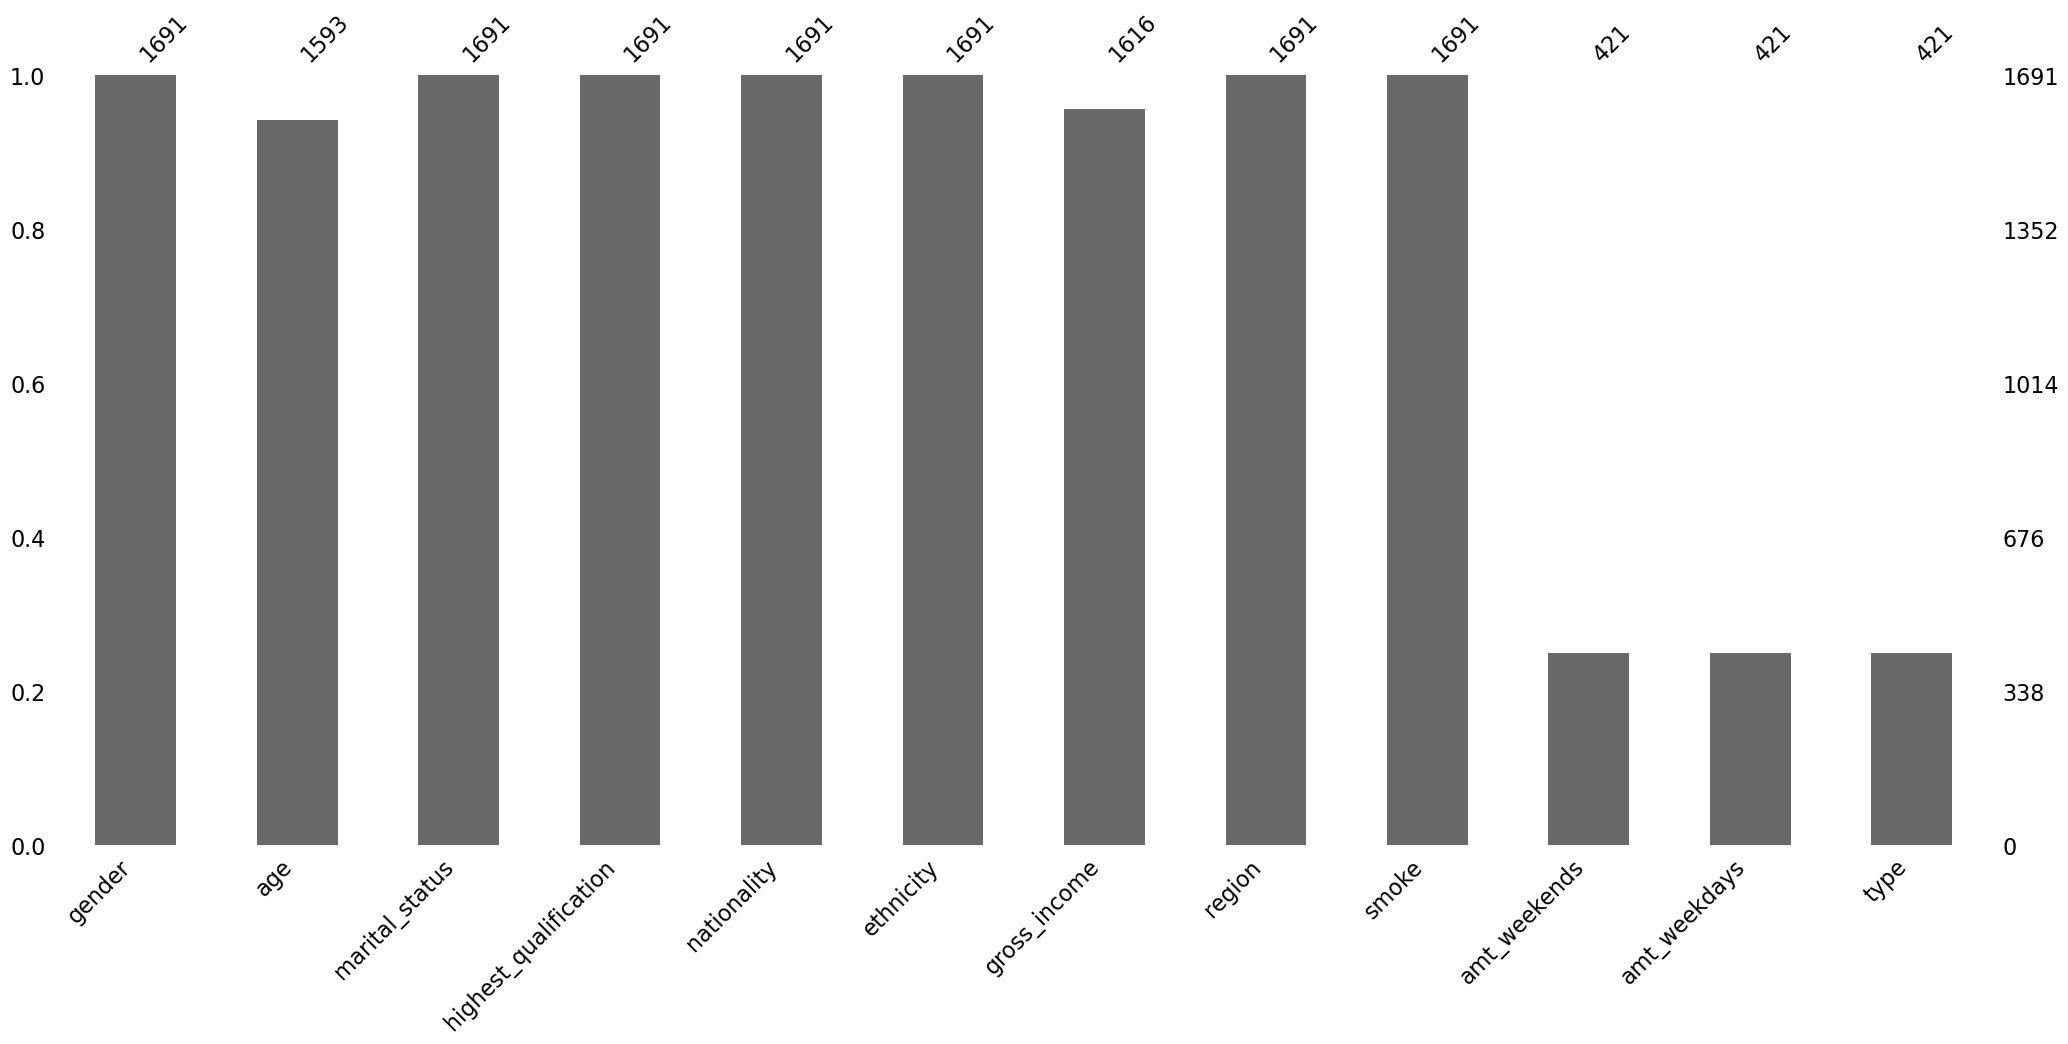

In [485]:
msno.bar(df)

<Axes: >

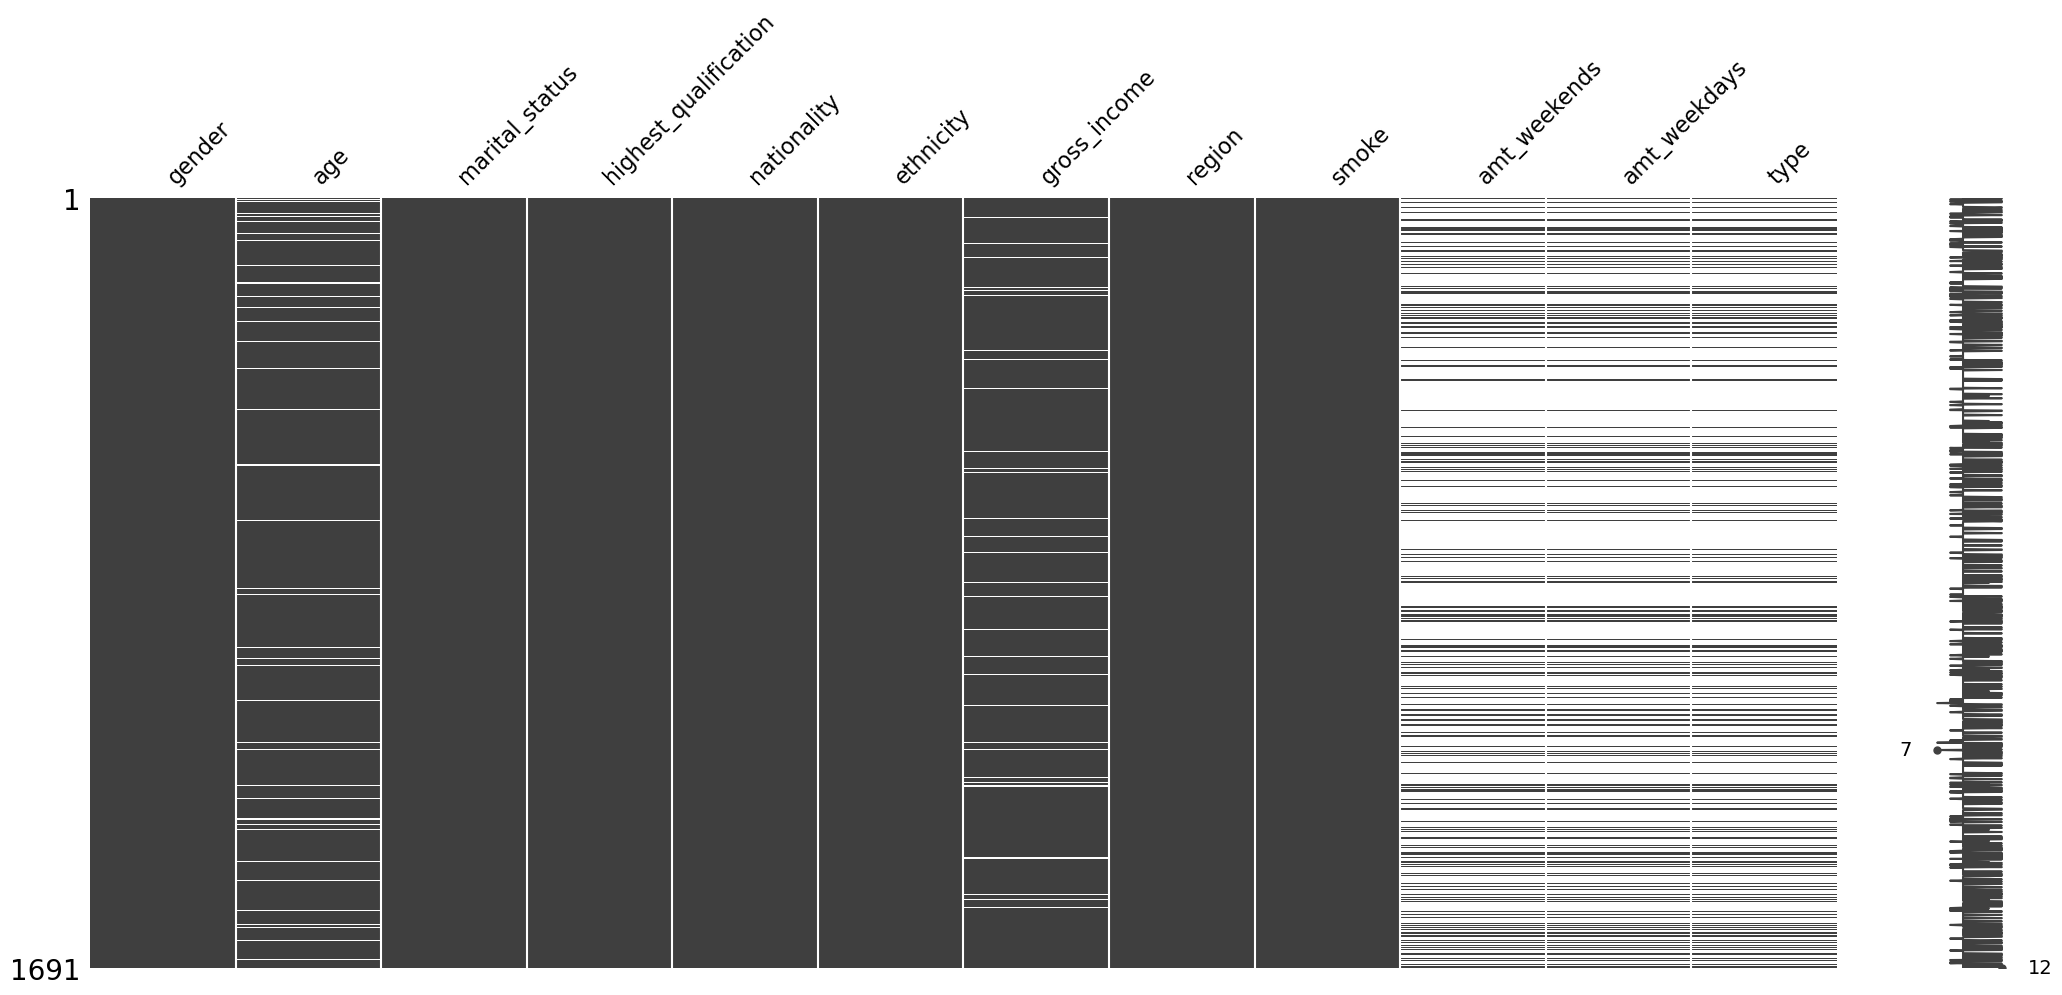

In [486]:
msno.matrix(df)

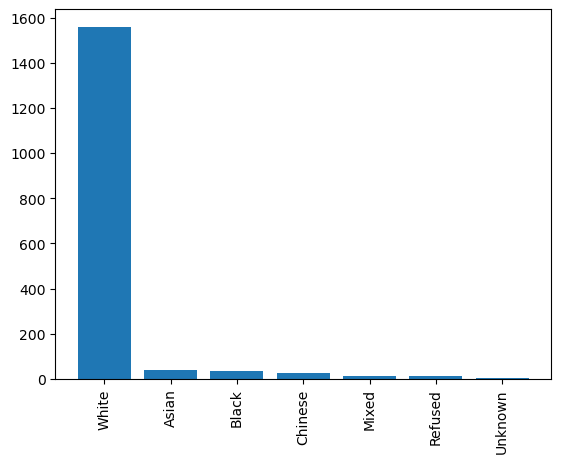

In [487]:
counts_per_type = df["ethnicity"].value_counts()
plt.bar(counts_per_type.index, counts_per_type)
plt.xticks(rotation=90)
plt.show()

In [488]:
df = df.drop(columns=["ethnicity", "type", "nationality"])

In [489]:
df = df.drop(columns=["amt_total", "amt_weekdays", "amt_weekends"], errors="ignore")

In [490]:
df

,gender,age,marital_status,highest_qualification,gross_income,region,smoke
0,Male,38.0,Divorced,No Qualification,"2,600 to 5,200",The North,No
1,Female,42.0,Single,No Qualification,"Under 2,600",The North,Yes
2,Male,40.0,Married,Degree,"28,600 to 36,400",The North,No
3,Female,NaN,Married,Degree,"10,400 to 15,600",The North,No
4,Female,39.0,Married,GCSE/O Level,"2,600 to 5,200",The North,No
...,...,...,...,...,...,...,...
1686,Male,22.0,Single,No Qualification,"2,600 to 5,200",Scotland,No
1687,Female,49.0,Divorced,Other/Sub Degree,"2,600 to 5,200",Scotland,Yes
1688,Male,45.0,Married,Other/Sub Degree,"5,200 to 10,400",Scotland,No
1689,Female,51.0,Married,No Qualification,"2,600 to 5,200",Scotland,Yes


In [491]:
import pandas as pd
import numpy as np

# Исчисти запирки
df["gross_income"] = df["gross_income"].str.replace(",", "")

# Подели по "to"
df[["gross_income_min", "gross_income_max"]] = df["gross_income"].str.split("to", expand=True)

# Поправи "Under"
mask_under = df["gross_income"].str.contains("Under", case=False, na=False)
df.loc[mask_under, "gross_income_min"] = 0
df.loc[mask_under, "gross_income_max"] = (
    df.loc[mask_under, "gross_income"].str.replace("Under", "").str.strip()
)

# Поправи "Above"
mask_above = df["gross_income"].str.contains("Above", case=False, na=False)
df.loc[mask_above, "gross_income_min"] = (
    df.loc[mask_above, "gross_income"].str.replace("Above", "").str.strip()
)
# max = најголемата позната бројка во датасетот
max_val = (
    df["gross_income_max"]
    .dropna()
    .astype(float)
    .max()
)
df.loc[mask_above, "gross_income_max"] = max_val

# Претвори во бројчени
df["gross_income_min"] = pd.to_numeric(df["gross_income_min"], errors="coerce")
df["gross_income_max"] = pd.to_numeric(df["gross_income_max"], errors="coerce")


df[["gross_income", "gross_income_min", "gross_income_max"]].head(10)


,gross_income,gross_income_min,gross_income_max
0,2600 to 5200,2600.0,5200.0
1,Under 2600,0.0,2600.0
2,28600 to 36400,28600.0,36400.0
3,10400 to 15600,10400.0,15600.0
4,2600 to 5200,2600.0,5200.0
5,15600 to 20800,15600.0,20800.0
6,Above 36400,36400.0,36400.0
7,10400 to 15600,10400.0,15600.0
8,2600 to 5200,2600.0,5200.0
9,5200 to 10400,5200.0,10400.0


In [492]:
df = df.drop(columns=["gross_income"])

<Axes: ylabel='Frequency'>

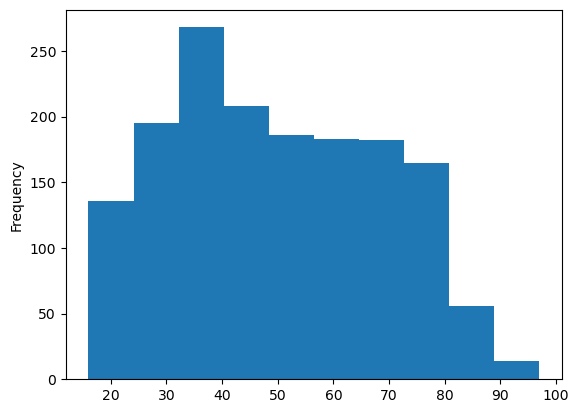

In [493]:
df["age"].plot.hist()

In [494]:
median_imputer = SimpleImputer(strategy="median")

In [495]:
df[["age"]] = median_imputer.fit_transform(df[["age"]])

In [496]:
df["age"].isnull().sum()

np.int64(0)

In [497]:
#constant_imputer = SimpleImputer(strategy="constant", fill_value=0)

In [498]:
#df["amt_weekends"] = constant_imputer.fit_transform([df["amt_weekends"]])[0]

In [499]:
#df["amt_weekdays"] = constant_imputer.fit_transform([df["amt_weekdays"]])[0]

In [500]:
#df["amt_total"] = df["amt_weekends"] + df["amt_weekdays"]
#df = df.drop(columns=["amt_weekends", "amt_weekdays"])

In [501]:
df.isnull().sum()

gender                     0
age                        0
marital_status             0
highest_qualification      0
region                     0
smoke                      0
gross_income_min         197
gross_income_max         197
dtype: int64

<Axes: >

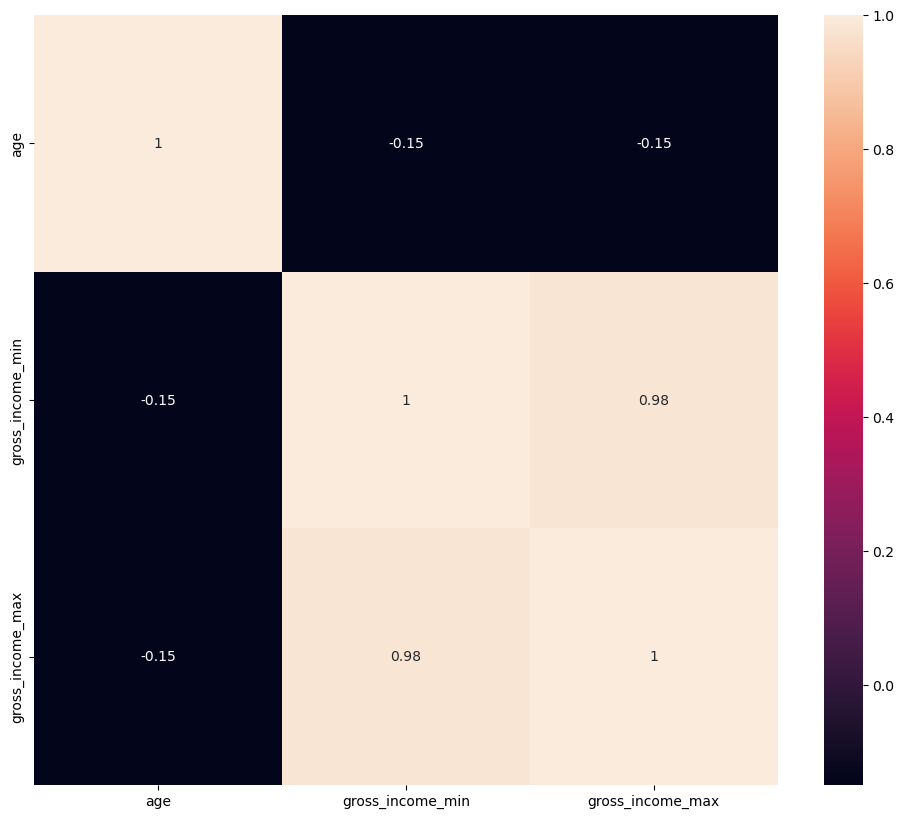

In [502]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   float64
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   region                 1691 non-null   object 
 5   smoke                  1691 non-null   object 
 6   gross_income_min       1494 non-null   float64
 7   gross_income_max       1494 non-null   float64
dtypes: float64(3), object(5)
memory usage: 105.8+ KB


In [504]:
df["highest_qualification"].value_counts()

highest_qualification
No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: count, dtype: int64

In [505]:
df["marital_status"].value_counts()

marital_status
Married      812
Single       427
Widowed      223
Divorced     161
Separated     68
Name: count, dtype: int64

In [506]:
df["smoke"].value_counts()

smoke
No     1270
Yes     421
Name: count, dtype: int64

In [507]:
label_encoder = LabelEncoder()

In [508]:
encoded_values = label_encoder.fit_transform(df["gender"])

In [509]:
encoded_values[:2]

array([1, 0])

In [510]:
label_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [511]:
df["gender"] = label_encoder.fit_transform(df["gender"])

In [512]:
encoded_values = label_encoder.fit_transform(df["smoke"])

In [513]:
encoded_values[:2]

array([0, 1])

In [514]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [515]:
df["smoke"] = label_encoder.fit_transform(df["smoke"])

In [516]:
df

,gender,age,marital_status,highest_qualification,region,smoke,gross_income_min,gross_income_max
0,1,38.0,Divorced,No Qualification,The North,0,2600.0,5200.0
1,0,42.0,Single,No Qualification,The North,1,0.0,2600.0
2,1,40.0,Married,Degree,The North,0,28600.0,36400.0
3,0,48.0,Married,Degree,The North,0,10400.0,15600.0
4,0,39.0,Married,GCSE/O Level,The North,0,2600.0,5200.0
...,...,...,...,...,...,...,...,...
1686,1,22.0,Single,No Qualification,Scotland,0,2600.0,5200.0
1687,0,49.0,Divorced,Other/Sub Degree,Scotland,1,2600.0,5200.0
1688,1,45.0,Married,Other/Sub Degree,Scotland,0,5200.0,10400.0
1689,0,51.0,Married,No Qualification,Scotland,1,2600.0,5200.0


In [517]:
# MARITAL STATUS
marital_map = {
    "Single": 0,
    "Married": 1,
    "Separated": 2,
    "Divorced": 3,
    "Widowed": 4
}
df["marital_status"] = df["marital_status"].map(marital_map)

# HIGHEST QUALIFICATION
qualification_map = {
    "No Qualification": 0,
    "GCSE/O Level": 1,
    "A Levels": 2,
    "Other/Sub Degree": 3,
    "Degree": 4,
    "Higher/Sub Degree": 5,
    "Post Graduate": 6
}
df["highest_qualification"] = df["highest_qualification"].map(qualification_map)


In [518]:
df = pd.get_dummies(df, columns=["region"], drop_first=True)

In [519]:
df["highest_qualification"] = df["highest_qualification"].fillna(
    df["highest_qualification"].median()
)

In [520]:
df

,gender,age,marital_status,highest_qualification,smoke,gross_income_min,gross_income_max,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales
0,1,38.0,3,0.0,0,2600.0,5200.0,False,False,False,False,True,False
1,0,42.0,0,0.0,1,0.0,2600.0,False,False,False,False,True,False
2,1,40.0,1,4.0,0,28600.0,36400.0,False,False,False,False,True,False
3,0,48.0,1,4.0,0,10400.0,15600.0,False,False,False,False,True,False
4,0,39.0,1,1.0,0,2600.0,5200.0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1,22.0,0,0.0,0,2600.0,5200.0,False,True,False,False,False,False
1687,0,49.0,3,3.0,1,2600.0,5200.0,False,True,False,False,False,False
1688,1,45.0,1,3.0,0,5200.0,10400.0,False,True,False,False,False,False
1689,0,51.0,1,0.0,1,2600.0,5200.0,False,True,False,False,False,False


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1691 non-null   int64  
 1   age                            1691 non-null   float64
 2   marital_status                 1691 non-null   int64  
 3   highest_qualification          1691 non-null   float64
 4   smoke                          1691 non-null   int64  
 5   gross_income_min               1494 non-null   float64
 6   gross_income_max               1494 non-null   float64
 7   region_Midlands & East Anglia  1691 non-null   bool   
 8   region_Scotland                1691 non-null   bool   
 9   region_South East              1691 non-null   bool   
 10  region_South West              1691 non-null   bool   
 11  region_The North               1691 non-null   bool   
 12  region_Wales                   1691 non-null   b

In [522]:
y = df["smoke"]                 # таргет (0 = не пуши, 1 = пуши)
X = df.drop(columns=["smoke"])  # сите останати колони се фичери

In [523]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 80% train, 20% test
    random_state=42,
    stratify=y           # да го зачуваме односот пушачи/не-пушачи
)

In [524]:
cols = ["gross_income_min", "gross_income_max", "age", "marital_status"]

imputer = IterativeImputer(random_state=42)

X_train[cols] = imputer.fit_transform(X_train[cols])
X_test[cols] = imputer.transform(X_test[cols])

In [525]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [526]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"   # ако класите се малку нерамномерни
)

In [527]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [528]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # веројатност за класа 1 (пушач)

In [529]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.6106194690265486
Precision: 0.34
Recall   : 0.6071428571428571
F1-score : 0.4358974358974359
ROC-AUC  : 0.6499766573295985

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70       255
           1       0.34      0.61      0.44        84

    accuracy                           0.61       339
   macro avg       0.58      0.61      0.57       339
weighted avg       0.71      0.61      0.64       339

